# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.


The data was organized  by Dr. Sina Kashuk at CUSP.
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


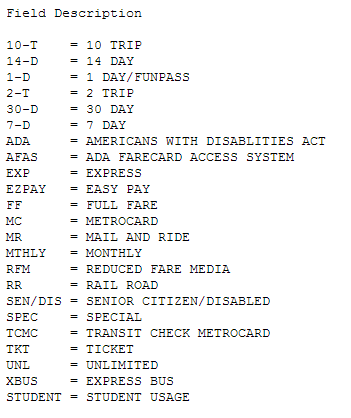

In [1]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)




In [8]:
!wget "https://github.com/fedhere/PUI2017_fb55/raw/master/HW10_fb55/MTA_Fare.npy"

--2017-12-06 22:42:25--  https://github.com/fedhere/PUI2017_fb55/raw/master/HW10_fb55/MTA_Fare.npy
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW10_fb55/MTA_Fare.npy [following]
--2017-12-06 22:42:25--  https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW10_fb55/MTA_Fare.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.20.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10708880 (10M) [application/octet-stream]
Saving to: ‘MTA_Fare.npy’

MTA_Fare.npy        100%[===================>]  10.21M  4.37MB/s    in 2.3s    

2017-12-06 22:42:28 (4.37 MB/s) - ‘MTA_Fare.npy’ saved [10708880/10708880]



In [11]:
mtaRides = np.load("MTA_Fare.npy")
mtaRides.shape

(600, 23, 194)

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.







## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

removing empty light curves

```
tots = tots[tots.std(1)>0]
```

with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

then you can run:

```
km.fit(vals)
```

# HINTS: 

## notes and hints: 

   1) you could coerce the data into a pandas dataframe, but the data is truly a "datacube": a 3D dataset, and flattening it into a pandas dataframe will make it far more difficult to manipulate. I strongly recommand you keep it as a numpy array
    
   2) note that the missing values are inputted as -1. if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the np.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```
as opposed to just 
```
np.mean(mtarides)
np.sum(mtarides)
```
 
## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, depending on the question) the appropriate dimension in different parts of the homework: when you need to work at the station level (if I ask "which station is the one that..."), collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average - *np.average(....weight=...)* -. The sum and average functions take an *axis* argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the right axis.


# Possibly useful functions

You are already familiar with and have already used  most of the functions I needed to perform this exercise. Here are some reminders and on few functions and methods that you may not have encountered yet which may be useful. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft()  

```
np.fft.rfft(mydata) 
```  

      will return the *real* part of the fourier transform (the fourier transform is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math; all you need to know is that you need the real part). But what you want is its absolute value: np.abs(). 
      To plot the fourier transform you may want the x-axis to be in frequency. To get the x-axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the array methods 
```
np.array.flatten()
np.array.reshape()
```
     allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which I recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
     
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````

*  after you operate on the array to collapse an axis, always check the dimensionality to assure you have indeed collapsed the right axis! see cell below

```
import numpy as np
data = np.random.rand(100,10)

print(data.shape)
Out[12]: (100, 10)

print(data.mean())
Out[13]:  0.4902457782

print(data.mean(axis=0).shape, data.mean(axis=1).shape)
Out[14]: (10,) (100,)

```

In [12]:
#after reading the datacube you should see:
mtaRides.shape


(600, 23, 194)

In [13]:
mtaRides = mtaRides.astype(float)
mtaRides[mtaRides == -1] = np.nan

In [16]:
# sum time series for all stations
print (mtaRides.shape)
mta_all_station_sum = np.nansum(mtaRides, axis=0)
print (mta_all_station_sum.shape)
#or for all ride types
mta_time_series = np.nansum(mta_all_station_sum, axis=0)
print (mta_time_series.shape)

(600, 23, 194)
(23, 194)
(194,)


In [17]:
mta_time_series = pd.DataFrame(mta_time_series)

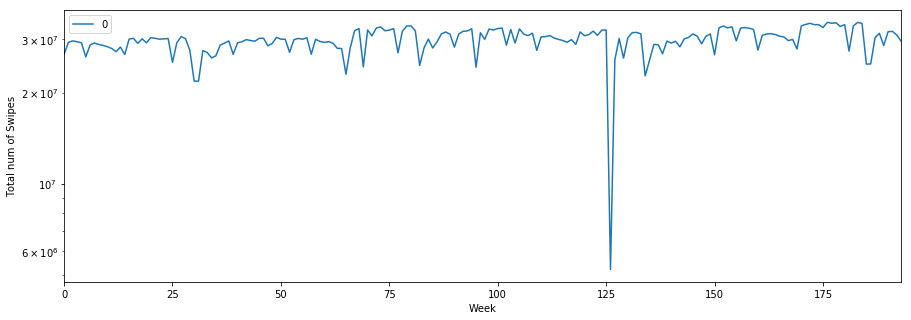

In [18]:
mta_time_series.plot(figsize=(15,5))
plt.xlabel('Week')
plt.ylabel('Total num of Swipes')
plt.yscale('log')

Fig1: The total number of swipes per week for the 194 weeks of data

In [19]:
swipes_mean = np.nanmean(mta_time_series)

swipes_std = np.nanstd(mta_time_series)

swipes_mean, swipes_std

(29781349.87113402, 2983960.421700886)

In [20]:
mta_time_series.loc[mta_time_series[0] > (swipes_mean + 3*swipes_std)]

,0


In [21]:
mta_time_series.loc[mta_time_series[0] < (swipes_mean - 3*swipes_std)]

,0
126,5218686.0


In [22]:
rng = pd.date_range(start ='5/28/2010', periods=127 , freq='7D')
rng

DatetimeIndex(['2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
               '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
               '2010-07-23', '2010-07-30',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', length=127, freq='7D')

The completion of 126 weeks corresponds to the week starting 10/26/2012. It corresponds to hurricane Sandy


## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

ride types list

In [23]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [24]:
rng = pd.date_range(start ='5/28/2010', periods=194 , freq='7D')
rng

DatetimeIndex(['2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
               '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
               '2010-07-23', '2010-07-30',
               ...
               '2013-12-06', '2013-12-13', '2013-12-20', '2013-12-27',
               '2014-01-03', '2014-01-10', '2014-01-17', '2014-01-24',
               '2014-01-31', '2014-02-07'],
              dtype='datetime64[ns]', length=194, freq='7D')

In [25]:
#sum time series for all stations
print (mtaRides.shape)
mta_by_ride = np.nansum(mtaRides, axis=0)
print(mta_by_ride.shape)

mta_by_ride = pd.DataFrame(mta_by_ride, index=ridetype ).T

mta_by_ride.head()

(600, 23, 194)
(23, 194)


,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
0,11494615.0,530524.0,47801.0,186551.0,46808.0,3697443.0,8551937.0,10063.0,333197.0,512032.0,...,123134.0,790110.0,59809.0,28221.0,0.0,124693.0,21060.0,6128.0,358.0,0.0
1,12526859.0,583533.0,51486.0,199229.0,64353.0,3981808.0,9486394.0,11847.0,282755.0,578023.0,...,151948.0,908068.0,69209.0,32333.0,0.0,121713.0,21670.0,6120.0,474.0,0.0
2,12766627.0,586194.0,51636.0,199668.0,56994.0,4033030.0,9476538.0,12277.0,302028.0,615537.0,...,151538.0,914124.0,69574.0,32618.0,0.0,122181.0,21433.0,6490.0,465.0,0.0
3,12653675.0,562602.0,52063.0,196389.0,37429.0,4032753.0,9450081.0,11221.0,305513.0,606270.0,...,147094.0,902549.0,68099.0,32404.0,0.0,122051.0,21630.0,6590.0,484.0,0.0
4,12809694.0,548858.0,51153.0,194883.0,35210.0,3925446.0,9294002.0,10515.0,335780.0,563446.0,...,137888.0,855573.0,66377.0,31933.0,176.0,119776.0,20297.0,6313.0,452.0,0.0


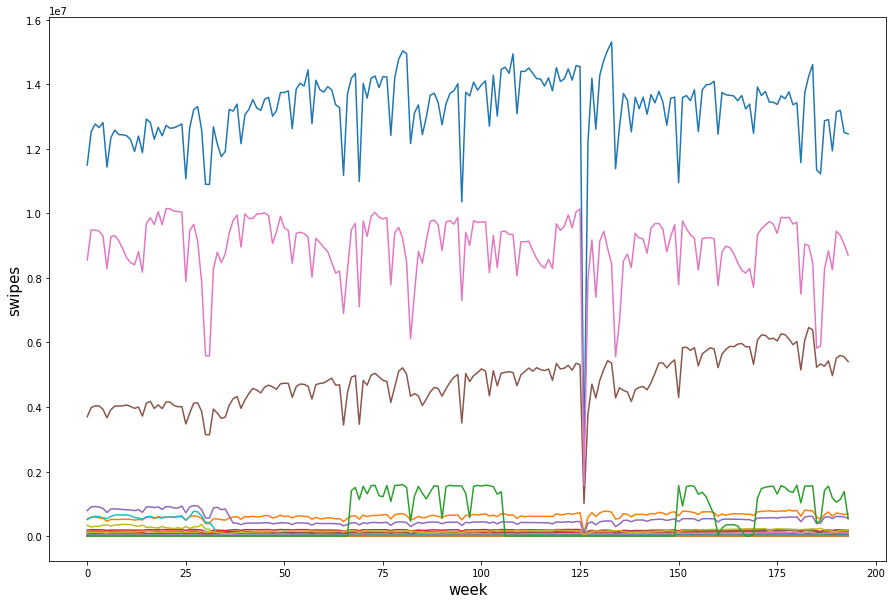

In [26]:
plt.figure(figsize=(15,10))
plt.plot(mta_by_ride)
plt.xlabel('week', fontsize=15)
plt.ylabel('swipes', fontsize=15)
plt.legend(loc='best')


fig2: This graph shows the time series visualization over the 194 weeks for all the 23 ride types

In [27]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mtaRides.shape)
mta_allsum = np.nansum(mtaRides, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mtaRides, axis=1)
print (mta_allsum.shape)



(600, 23, 194)
(23, 194)
(600, 194)


## NOTE ON THE TREND DETECTION:
### you should find the *card type* that has the steepest increase, and the steepest decrease. Notice: we are looking for something that has a more or less constant trend

### to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

### you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the *number of rides* near the beginning to the *number of rides* near the end of the time series.

### notice that you should inspect the time series, algorithmically or at least by eye, to ensure you see a trend, and not just changing structure. Below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

In [28]:
mta_by_ride_start = pd.rolling_mean(mta_by_ride, 10).iloc[9:19].apply(lambda x: np.mean(x))

mta_by_ride_end = pd.rolling_mean(mta_by_ride, 10).iloc[-10:].apply(lambda x: np.mean(x))

/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.
/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
mta_by_ride_ratio = (mta_by_ride_start)/mta_by_ride_end

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64c5c6b510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f64bfb5d1d0>]], dtype=object)

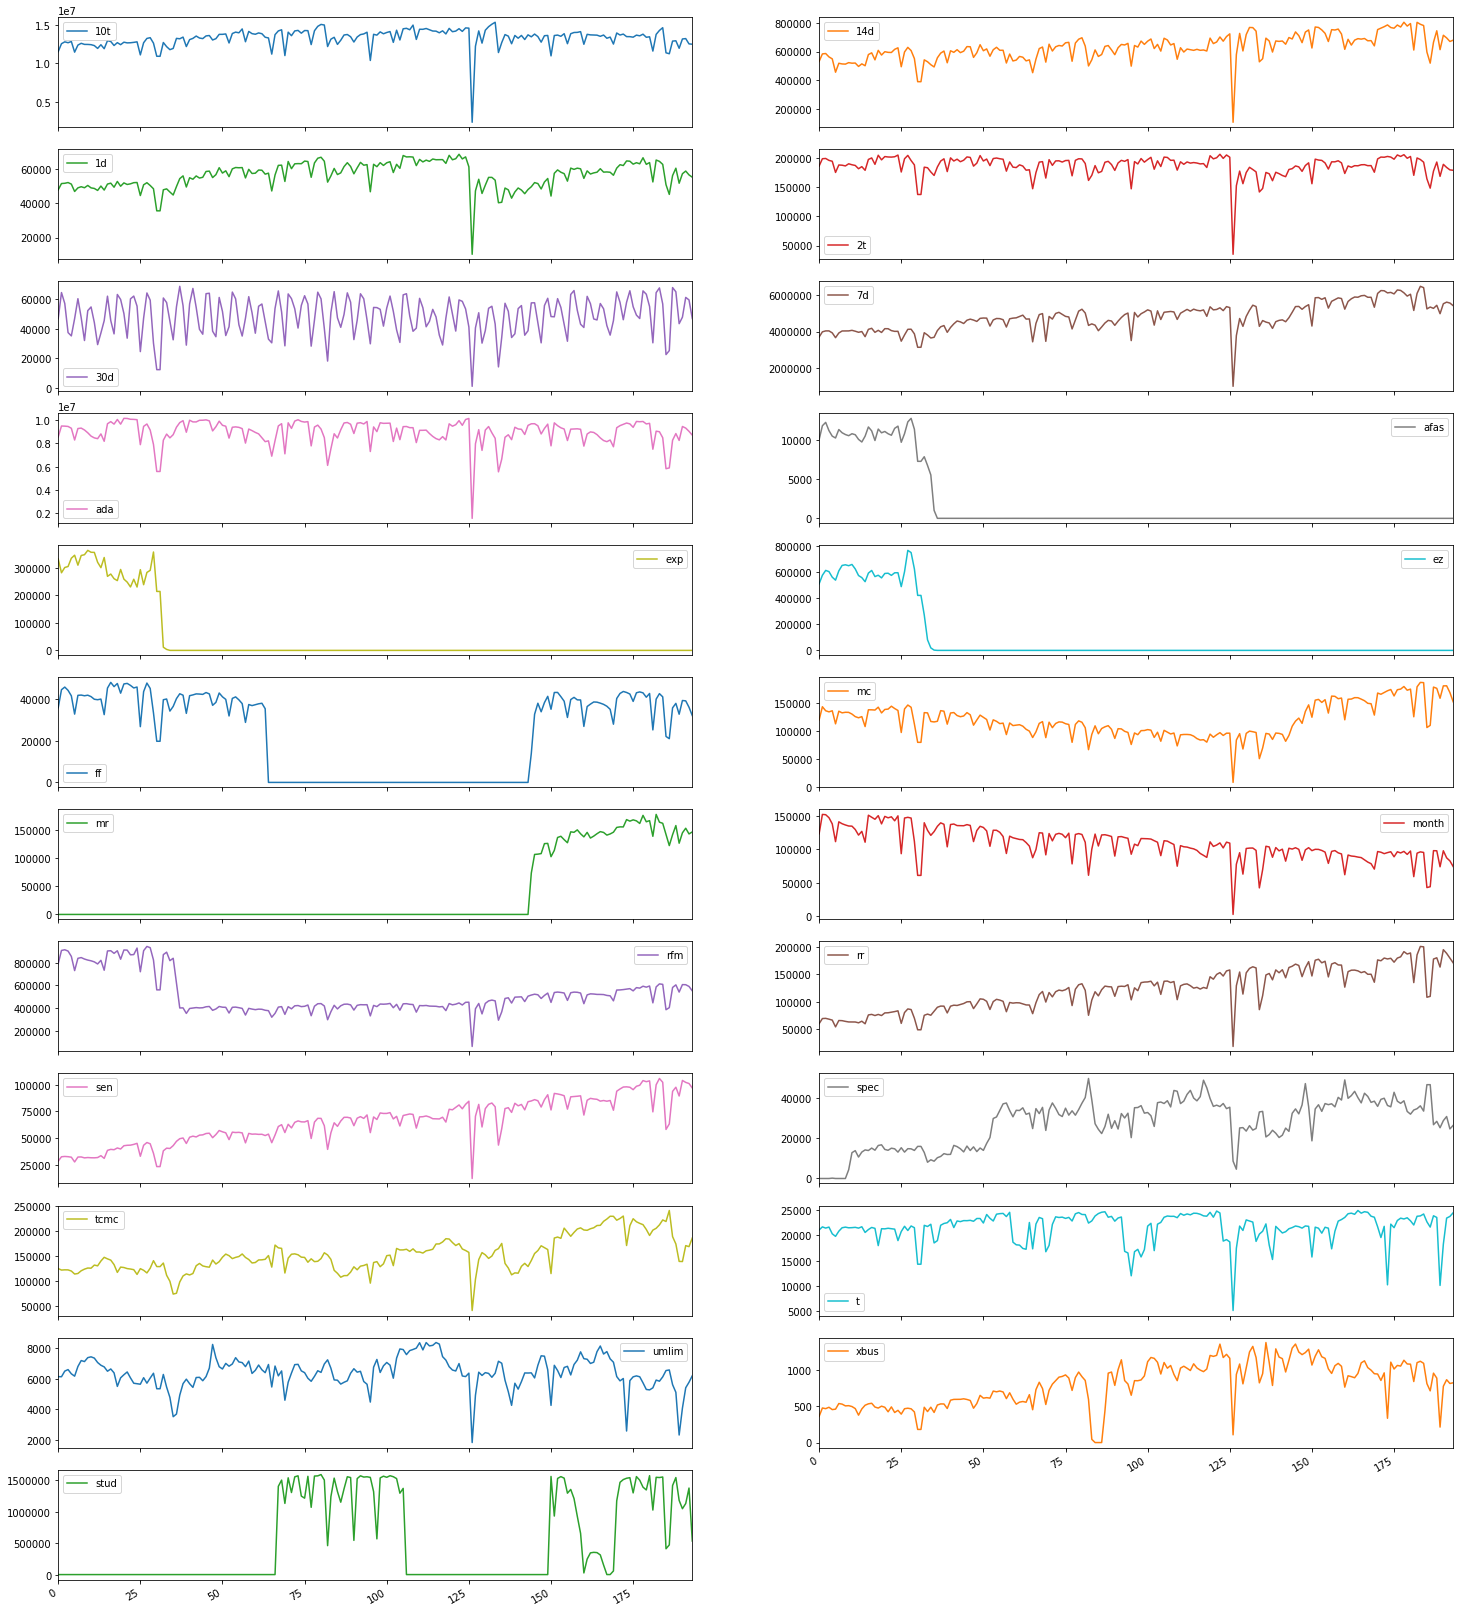

In [30]:
mta_by_ride.plot(subplots= True, layout=(15,2), figsize=(25,40))

Fig3: This figure is showing the same data as in Fig2 but each ride type plotted separately for better visualization

*** We do not want to consider the variables which have a minimum of 0 for extended periods of time. In such cases it means the ride type has not been offered for a period of time or some similar factor at play ***

*** So we exclude 'afas' , 'exp', 'ez', 'ff', 'mr' and 'stud' ***

In [31]:
mta_by_ride_ratio.drop(['afas', 'exp', 'ez', 'ff', 'mr', 'stud', 'spec']).sort_values()

sen      0.351323
rr       0.380139
xbus     0.525909
tcmc     0.631542
7d       0.693391
14d      0.740123
mc       0.800016
1d       0.846901
30d      0.893979
t        0.948527
10t      0.952452
2t       1.017463
ada      1.067421
umlim    1.233656
rfm      1.512114
month    1.619633
dtype: float64

*** The biggest increase is for 'sen' which stands for 'senior' ***

*** The biggest drop is for 'month' which stands for 'monthly' ***

/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.


Text(0.5,1,u'Smoothed Curve')

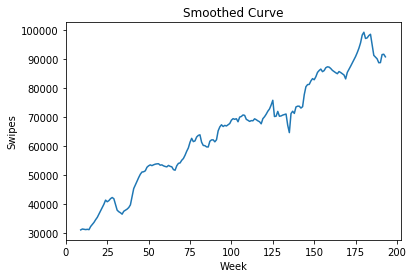

In [32]:
mta_by_ride_rolling = pd.rolling_mean(mta_by_ride, 10)

plt.plot((mta_by_ride_rolling.sen))

plt.xlim(xmin = 0)

plt.xlabel('Week')

plt.ylabel('Swipes')

plt.title('Smoothed Curve')

Text(0.5,1,u'Smoothed Curve')

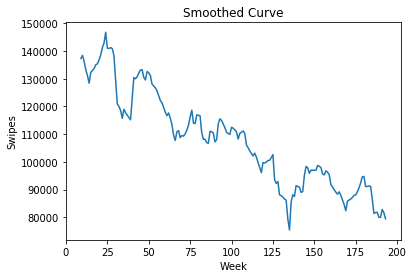

In [33]:
plt.plot((mta_by_ride_rolling.month))

plt.xlim(xmin = 0)
plt.xlabel('Week')

plt.ylabel('Swipes')
plt.title('Smoothed Curve')

to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [34]:
#one can sum time series for all stations
print (mtaRides.shape)
swipe_by_station = np.nansum(mtaRides, axis=1)
print (swipe_by_station.shape)



(600, 23, 194)
(600, 194)


/home/pui-user/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


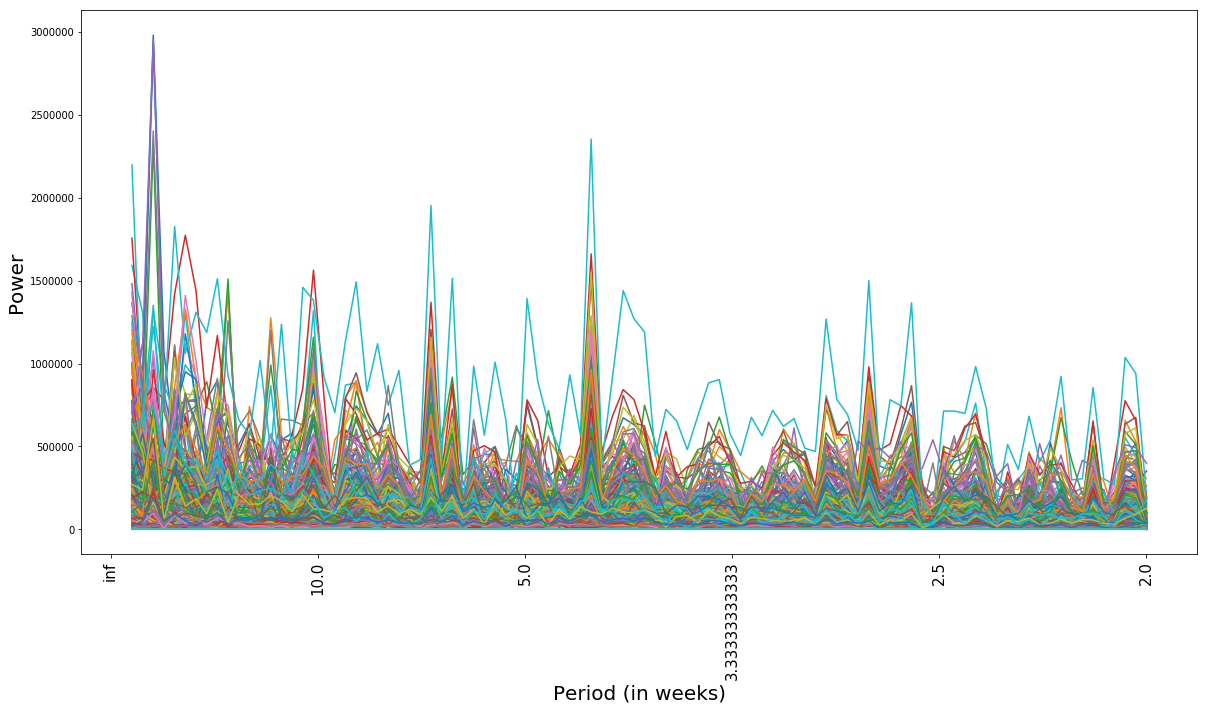

In [35]:
fig = plt.figure(figsize=(20,10))
plt.xlabel("Period (in weeks)", fontsize=20)
plt.ylabel("Power", fontsize=20)
ax = fig.add_subplot(111)
N = 194

x = np.fft.rfftfreq(N, 1.0)

for i in range(len(swipe_by_station)):
    f = np.abs(np.fft.rfft(swipe_by_station[i]))
    plt.plot(x[2:], f[2:], '-')

ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], rotation=90, fontsize=15);

*** Choosing treshold as 2400000 *** 

/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


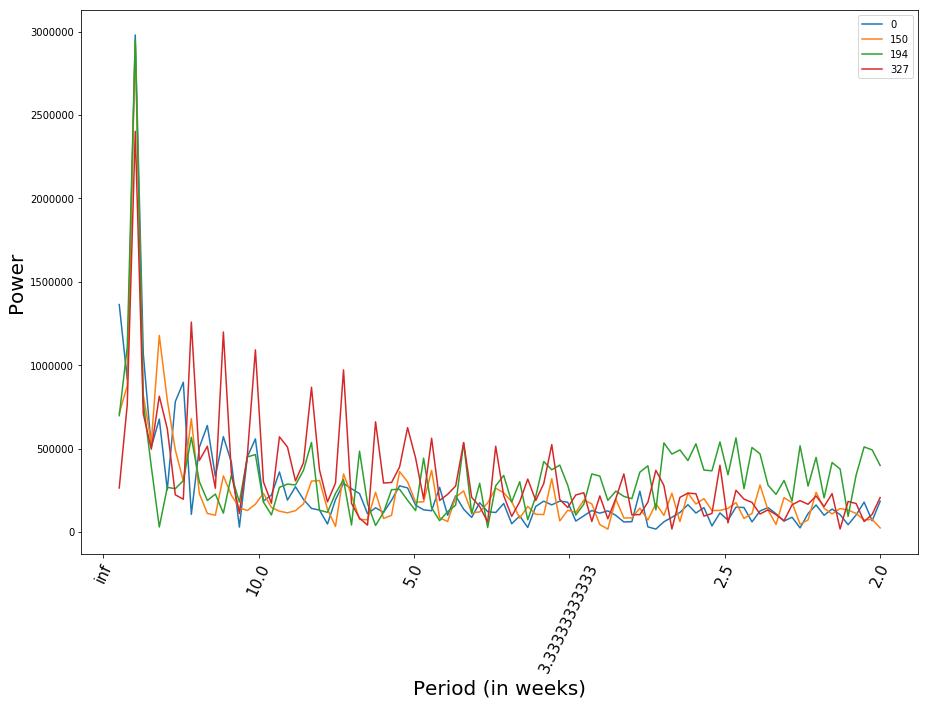

In [36]:
fig = plt.figure(figsize=(15,10))
plt.xlabel("Period (in weeks)", fontsize=20)
plt.ylabel("Power", fontsize=20)
ax = fig.add_subplot(111)
N = 194

x = np.fft.rfftfreq(N, 1.0)

for i in range(len(swipe_by_station)):
    f = np.abs(np.fft.rfft(swipe_by_station[i]))
    if f[2:].max() > 2400000:
        plt.plot(x[2:], f[2:], '-', label=i)
        plt.legend()

ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], rotation=65, fontsize=15);

The above figure identifies stations 0, 150, 194 and 327 as our 4 stations with the highest periodicity. Let's plot them below to see if we can visually confirm periodicity.

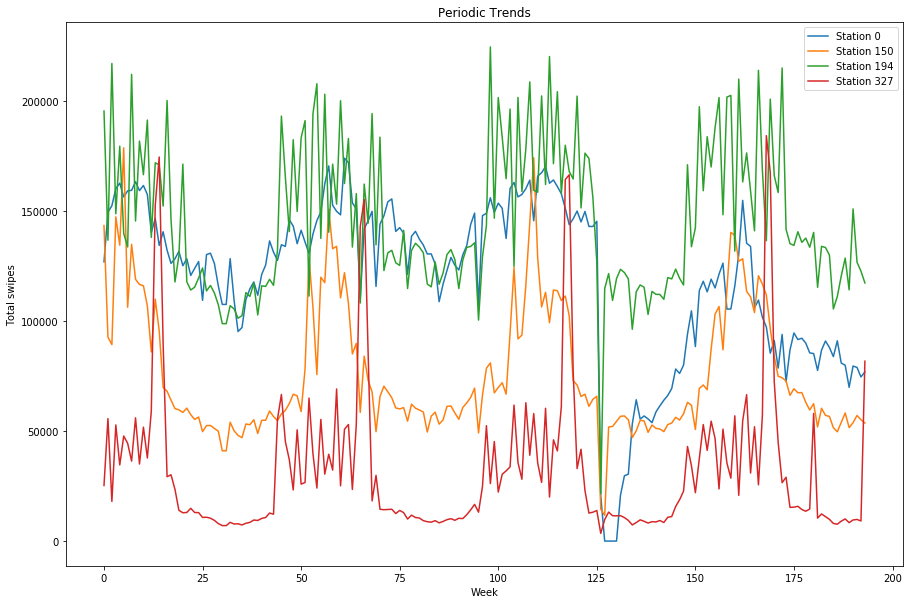

In [37]:
fig = plt.figure(figsize=(15,10))
plt.title("Periodic Trends")
plt.xlabel("Week")
plt.ylabel("Total swipes")
plt.plot(swipe_by_station[0], label='Station 0')
plt.plot(swipe_by_station[150], label='Station 150')
plt.plot(swipe_by_station[194], label='Station 194')
plt.plot(swipe_by_station[327], label='Station 327')
plt.legend(loc='best')

This plot shows the top 4 stations in periodicity

*** Let us focus the plot on a single year to understand the trends ***

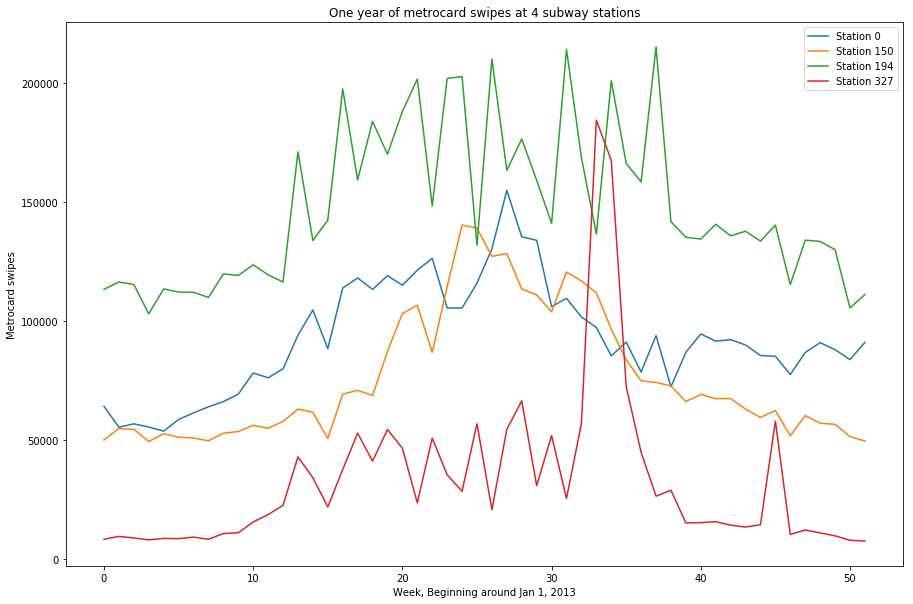

In [38]:
fig = plt.figure(figsize=(15,10))
plt.title("One year of metrocard swipes at 4 subway stations")
plt.xlabel("Week, Beginning around Jan 1, 2013")
plt.ylabel("Metrocard swipes")
plt.plot(swipe_by_station[0,135:187], label='Station 0')
plt.plot(swipe_by_station[150,135:187], label='Station 150')
plt.plot(swipe_by_station[194,135:187], label='Station 194')
plt.plot(swipe_by_station[327,135:187], label='Station 327')
plt.legend(loc='best')

This figure shows the 1 year periodic trend of the top 4 stations

The Summer months have higher traffic/swipes. These stations can be very touristy stations.